In [1]:
%load_ext autoreload
%autoreload 2

# Task 2

In [2]:
from pde_find import PDE_FIND, PDE_FIND_3D

### File 1

In [3]:
dif1 = PDE_FIND('1')

{'u': 0, 'x': 1, 't': 2}
torch.Size([3, 256, 101])


In [4]:
classify = {
    'dep': ['u'],
    'indep': ['x', 't'],
}
dif1.create_list_of_possible_terms(classify, order=3)

15 terms
['u', 'u_x', 'u_xx', 'u_xxx', 'u*u', 'u*u_x', 'u*u_xx', 'u*u_xxx', 'u_x*u_x', 'u_x*u_xx', 'u_x*u_xxx', 'u_xx*u_xx', 'u_xx*u_xxx', 'u_xxx*u_xxx', 'u*u*u']


In [5]:
derivatives = dif1.get_derivatives(classify)

4 derivatives computed
dict_keys(['u_x', 'u_xx', 'u_xxx', 'u_t'])


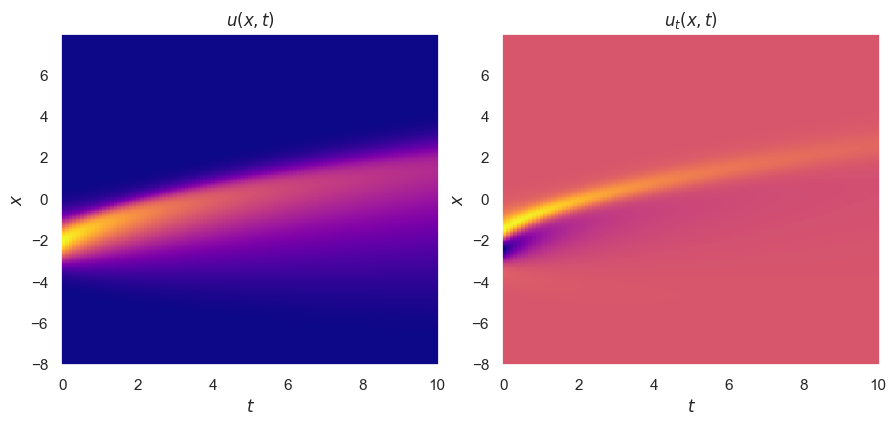

In [6]:
fig = dif1.plot(derivatives['u_t'].squeeze(), 'u_t')
# save the figure
fig.savefig('u_t_1.png')

In [7]:
dif1.create_feature_library(classify, derivatives)

15 terms
term u done 1/15
term u_x done 2/15
term u_xx done 3/15
term u_xxx done 4/15
term u*u done 5/15
term u*u_x done 6/15
term u*u_xx done 7/15
term u*u_xxx done 8/15
term u_x*u_x done 9/15
term u_x*u_xx done 10/15
term u_x*u_xxx done 11/15
term u_xx*u_xx done 12/15
term u_xx*u_xxx done 13/15
term u_xxx*u_xxx done 14/15
term u*u*u done 15/15


In [8]:
weights = dif1.solve(classify['library'], 
                     derivatives['u_t'].squeeze(),
                     sparsity_threshold=1e-2,
                     alphas=[1e-6, 1e-5],
                     fit_intercept=False,
                     cv=3,
                     tol=1e-6,
                     max_iter=int(1e8))

Best alpha: 1e-06


In [9]:
weights

tensor([ 0.0000,  0.0000,  0.1012,  0.0000,  0.0000, -1.0039,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000])

In [10]:
result = dif1.test(classify, weights)

Number of terms: 2
PDE:
	-1.0u*u_x + 0.1u_xx = u_t


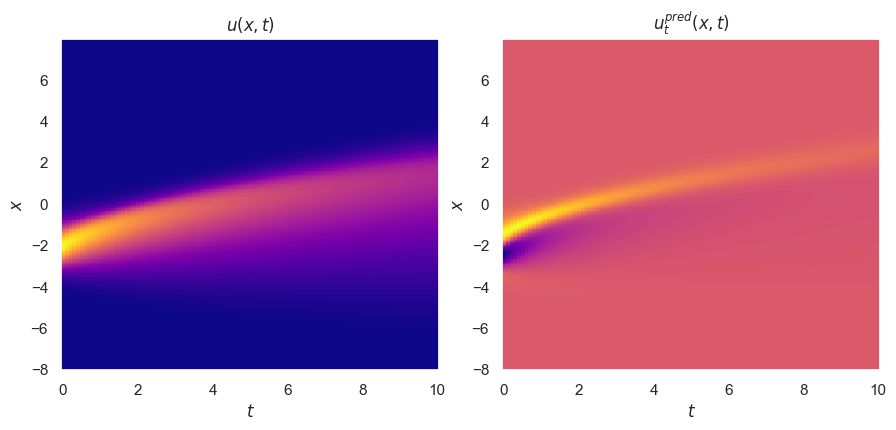

In [11]:
fig = dif1.plot(result.detach().squeeze(), 'u_t^{pred}')

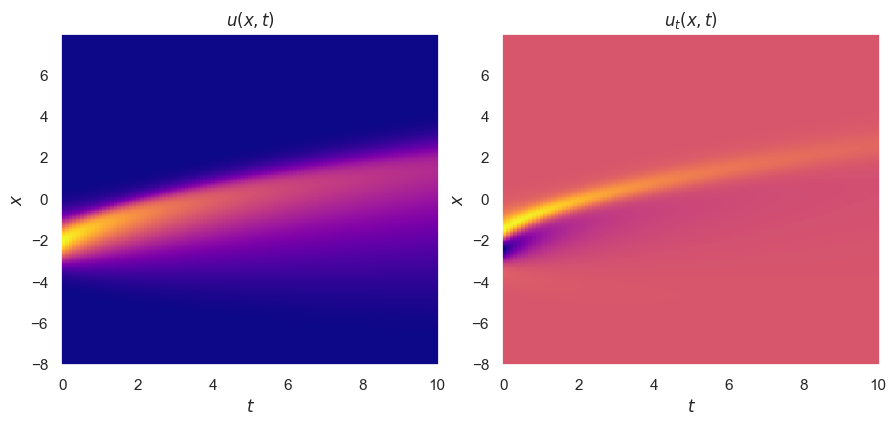

In [12]:
fig = dif1.plot(derivatives['u_t'].squeeze(), 'u_t')

### File 2

In [13]:
dif2 = PDE_FIND('2')

{'u': 0, 'x': 1, 't': 2}
torch.Size([3, 512, 201])


In [14]:
classify = {
    'dep': ['u'],
    'indep': ['x', 't'],
}
dif2.create_list_of_possible_terms(classify)

15 terms
['u', 'u_x', 'u_xx', 'u_xxx', 'u*u', 'u*u_x', 'u*u_xx', 'u*u_xxx', 'u_x*u_x', 'u_x*u_xx', 'u_x*u_xxx', 'u_xx*u_xx', 'u_xx*u_xxx', 'u_xxx*u_xxx', 'u*u*u']


In [15]:
derivatives = dif2.get_derivatives(classify, periodic=True)

4 derivatives computed
dict_keys(['u_x', 'u_xx', 'u_xxx', 'u_t'])


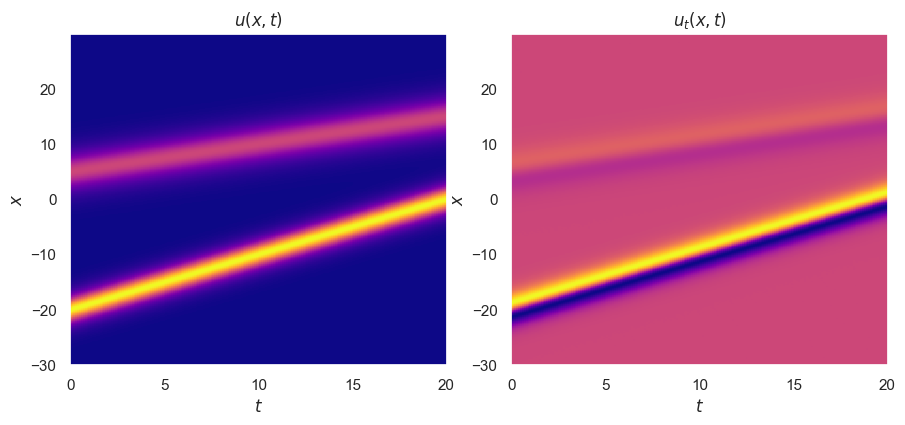

In [16]:
fig = dif2.plot(derivatives['u_t'].squeeze(), 'u_t')
# save the figure
fig.savefig('u_t_2.png')

In [17]:
dif2.create_feature_library(classify, derivatives)

15 terms
term u done 1/15
term u_x done 2/15
term u_xx done 3/15
term u_xxx done 4/15
term u*u done 5/15
term u*u_x done 6/15
term u*u_xx done 7/15
term u*u_xxx done 8/15
term u_x*u_x done 9/15
term u_x*u_xx done 10/15
term u_x*u_xxx done 11/15
term u_xx*u_xx done 12/15
term u_xx*u_xxx done 13/15
term u_xxx*u_xxx done 14/15
term u*u*u done 15/15


In [24]:
alphas = [1e-6, 1e-4, 1e-2]
weights = dif2.solve(classify['library'], 
                     derivatives['u_t'].squeeze(),
                     sparsity_threshold=1e-2,
                     alphas=alphas,
                     fit_intercept=False,
                     cv=3,
                     tol=1e-6,
                     max_iter=int(1e8))

Best alpha: 1e-06


In [25]:
result = dif2.test(classify, weights)

Number of terms: 4
PDE:
	-5.4u*u_x + -0.9u_xxx + -0.11u_x*u_xx + -0.081u_x = u_t


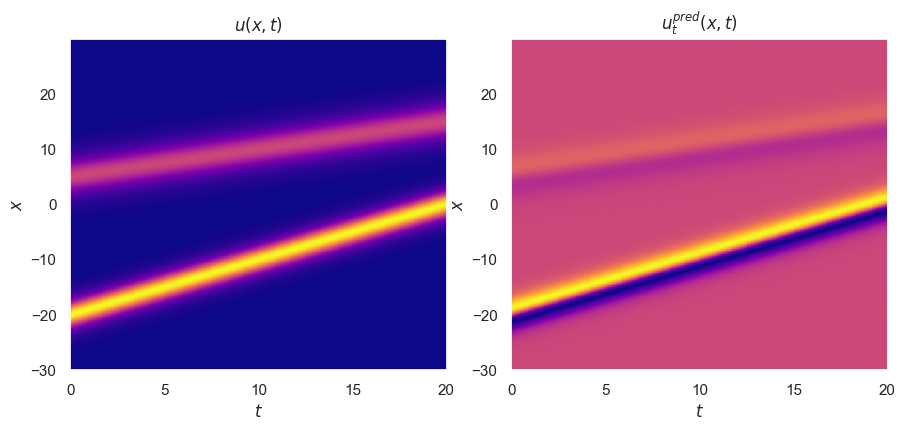

In [26]:
fig = dif2.plot(result.detach().squeeze(), 'u_t^{pred}')

### File 3

In [3]:
dif3 = PDE_FIND_3D('3')

{'u': 0, 'v': 1, 'x': 2, 'y': 3, 't': 4}
torch.Size([5, 256, 256, 201])


In [4]:
# anim_u = dif3.animate(0)
# # Takes around 1 min 40 secs to save
# anim_u.save('eq3_u.gif', fps=30)}

In [5]:
# anim_v = dif3.animate(1)
# anim_v.save('eq3_v.gif', fps=30)

In [6]:
classify = {
    'dep': ['u', 'v'],
    'indep': ['x', 'y', 't'],
}

In [7]:
dif3.create_list_of_possible_terms(classify, max_terms=1, order=3)

52 terms
['u', 'v', 'u_x', 'u_xx', 'u_xxx', 'u_xxy', 'u_xy', 'u_xyx', 'u_xyy', 'u_y', 'u_yy', 'u_yyx', 'u_yyy', 'v_x', 'v_xx', 'v_xxx', 'v_xxy', 'v_xy', 'v_xyx', 'v_xyy', 'v_y', 'v_yy', 'v_yyx', 'v_yyy', 'u*u', 'v*v', 'u_x*u_x', 'u_xx*u_xx', 'u_xxx*u_xxx', 'u_xxy*u_xxy', 'u_xy*u_xy', 'u_xyx*u_xyx', 'u_xyy*u_xyy', 'u_y*u_y', 'u_yy*u_yy', 'u_yyx*u_yyx', 'u_yyy*u_yyy', 'v_x*v_x', 'v_xx*v_xx', 'v_xxx*v_xxx', 'v_xxy*v_xxy', 'v_xy*v_xy', 'v_xyx*v_xyx', 'v_xyy*v_xyy', 'v_y*v_y', 'v_yy*v_yy', 'v_yyx*v_yyx', 'v_yyy*v_yyy', 'u*u*u', 'u*u*v', 'u*v*v', 'v*v*v']


In [8]:
derivatives = dif3.get_derivatives(classify, periodic=True)

24 derivatives computed
dict_keys(['u_x', 'u_xx', 'u_xxx', 'u_xxy', 'u_xy', 'u_xyx', 'u_xyy', 'u_y', 'u_yy', 'u_yyx', 'u_yyy', 'v_x', 'v_xx', 'v_xxx', 'v_xxy', 'v_xy', 'v_xyx', 'v_xyy', 'v_y', 'v_yy', 'v_yyx', 'v_yyy', 'u_t', 'v_t'])


In [9]:
dif3.subsample_data(derivatives, percent=0.1)

In [10]:
components = dif3.create_feature_library(classify, derivatives)

52 terms
term u done 1/52
term v done 2/52
term u_x done 3/52
term u_xx done 4/52
term u_xxx done 5/52
term u_xxy done 6/52
term u_xy done 7/52
term u_xyx done 8/52
term u_xyy done 9/52
term u_y done 10/52
term u_yy done 11/52
term u_yyx done 12/52
term u_yyy done 13/52
term v_x done 14/52
term v_xx done 15/52
term v_xxx done 16/52
term v_xxy done 17/52
term v_xy done 18/52
term v_xyx done 19/52
term v_xyy done 20/52
term v_y done 21/52
term v_yy done 22/52
term v_yyx done 23/52
term v_yyy done 24/52
term u*u done 25/52
term v*v done 26/52
term u_x*u_x done 27/52
term u_xx*u_xx done 28/52
term u_xxx*u_xxx done 29/52
term u_xxy*u_xxy done 30/52
term u_xy*u_xy done 31/52
term u_xyx*u_xyx done 32/52
term u_xyy*u_xyy done 33/52
term u_y*u_y done 34/52
term u_yy*u_yy done 35/52
term u_yyx*u_yyx done 36/52
term u_yyy*u_yyy done 37/52
term v_x*v_x done 38/52
term v_xx*v_xx done 39/52
term v_xxx*v_xxx done 40/52
term v_xxy*v_xxy done 41/52
term v_xy*v_xy done 42/52
term v_xyx*v_xyx done 43/52


In [11]:
# I had to reduce the max_iter to 1e3 to get it to solve
# in a reasonable amount of time
weights_u = dif3.solve(
    classify['library'],
    derivatives['u_t'].squeeze(),
    sparsity_threshold = 0.01,
    alphas=[1e-2, 1e-3, 1e-4],
    max_iter=int(1e6),
)


Best alpha: 0.0001


In [13]:
weights_v = dif3.solve(
    classify['library'],
    derivatives['v_t'].squeeze(),
    sparsity_threshold = 0.01,
    alphas=[1e-4, 1e-2, 1e-1],
    fit_intercept=False,
    cv=3,
    tol=1e-6,
    max_iter=int(1e8)
)

Best alpha: 0.0001


In [12]:
result_u = dif3.test(classify, weights_u)

Number of terms: 10
PDE:
	0.71v*v*v + 0.71u*u*v + 0.39u + -0.36u*u*u + -0.36u*v*v + 0.25v + 0.063u_yy + 0.06u_xx + -0.011v_yy + -0.01v_xx = u_t


In [14]:
result_v = dif3.test(classify, weights_v, name='v')

Number of terms: 10
PDE:
	-0.74u*u*u + -0.74u*v*v + 0.41v + -0.38v*v*v + -0.38u*u*v + -0.22u + 0.065v_xx + 0.062v_yy + 0.011u_xx + 0.01u_yy = v_t


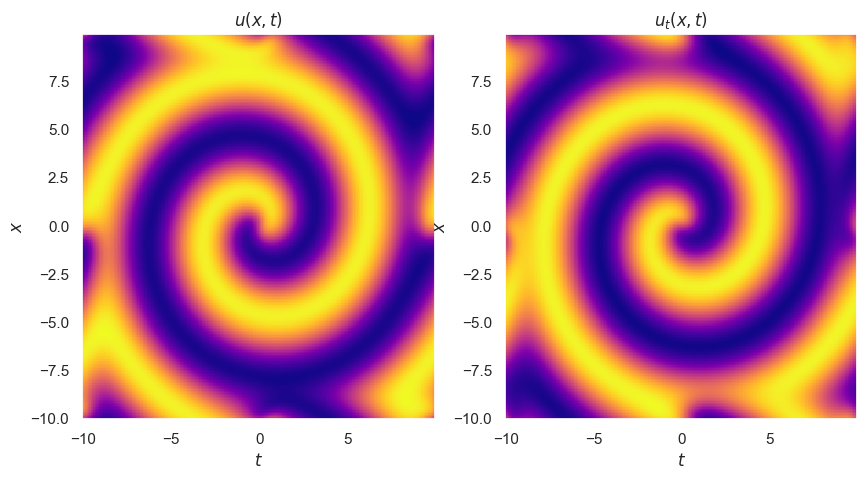

In [15]:
fig = dif3.plot(derivatives['u_t'].squeeze(), 'u_t', idx=10)

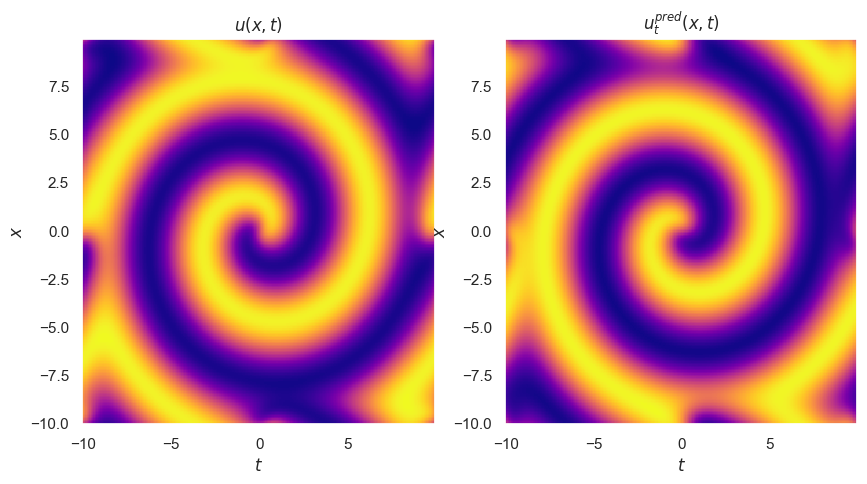

In [16]:
fig = dif3.plot(result_u.detach().squeeze(), 'u_t^{pred}', idx=10)

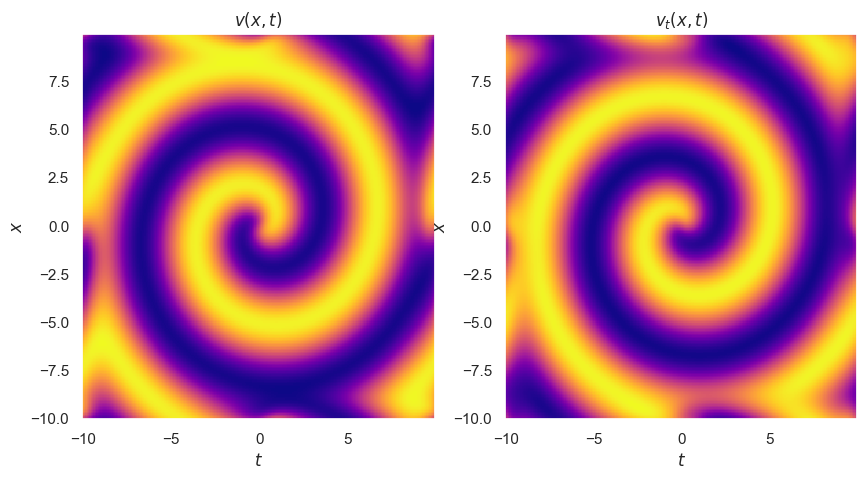

In [17]:
fig = dif3.plot(derivatives['v_t'].squeeze(), 'v_t', idx=15)

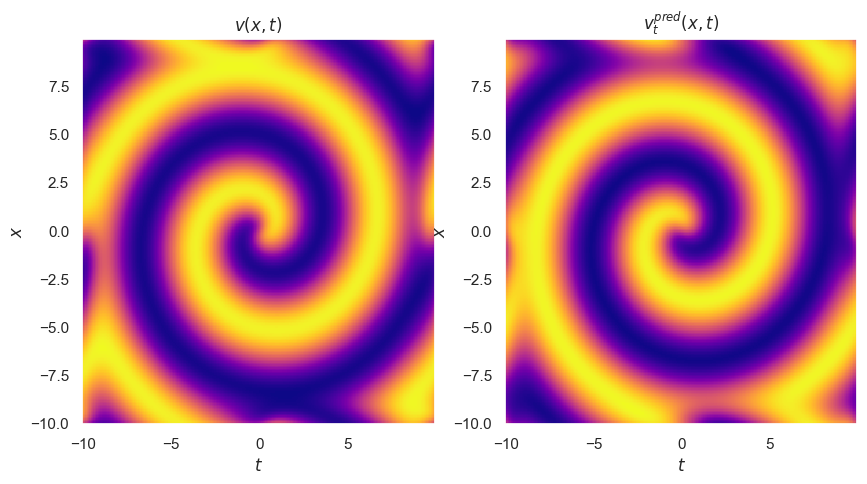

In [18]:
fig = dif3.plot(result_v.detach().squeeze(), 'v_t^{pred}',  idx=15)